<a href="https://colab.research.google.com/github/annatsai0803/Hospital_Food_Demand_Forecasting/blob/main/Apollo_Hospital_Food_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with Time Series Data

In [ ]:
# This piece of code will get rid of warnings output
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [ ]:
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

In [ ]:
df = pd.read_excel("IMB465-XLS-ENG.xls")
df.head()

,Date,BKFST_OCCUP,Idly,Dosa,Chutney,Sambar,Continental B/F,North Indian B/F,Omellette
0,2012-10-01,250,40,30,95,95,25,6,15
1,2012-10-02,236,65,33,120,120,25,2,7
2,2012-10-03,244,59,21,119,120,25,2,8
3,2012-10-04,239,65,42,140,150,35,5,10
4,2012-10-05,221,70,26,126,126,41,3,13


In [ ]:
# Make sure the data has the correct data types

df.info()

# We do not need this here, but if your Date is not in a datetime format, you would want to change it using df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              115 non-null    datetime64[ns]
 1   BKFST_OCCUP       115 non-null    int64         
 2   Idly              115 non-null    int64         
 3   Dosa              115 non-null    int64         
 4   Chutney           115 non-null    int64         
 5   Sambar            115 non-null    int64         
 6   Continental B/F   115 non-null    int64         
 7   North Indian B/F  115 non-null    int64         
 8   Omellette         115 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 8.2 KB


In [ ]:
df = df.rename(columns={'Continental B/F': 'Continental_BF', 'North Indian B/F': 'North_Indian_BF'})
df.describe().round(2)
#df.describe().select_dtypes(include=['number']).round(2)

,Date,BKFST_OCCUP,Idly,Dosa,Chutney,Sambar,Continental_BF,North_Indian_BF,Omellette
count,115,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00
mean,2012-11-27 00:00:00,215.16,59.27,25.48,131.34,131.47,41.30,4.35,13.59
min,2012-10-01 00:00:00,151.00,40.00,0.00,95.00,95.00,25.00,0.00,5.00
25%,2012-10-29 12:00:00,200.00,54.00,18.00,125.00,125.00,40.00,2.50,10.00
50%,2012-11-27 00:00:00,215.00,61.00,22.00,130.00,130.00,40.00,5.00,13.00
75%,2012-12-25 12:00:00,228.50,65.00,27.00,135.00,136.00,44.00,6.00,20.00
max,2013-01-23 00:00:00,259.00,70.00,62.00,160.00,160.00,55.00,8.00,22.00
std,NaN,19.38,7.03,11.38,10.87,11.12,5.79,1.99,5.26


In [ ]:
# For each variable, compute coefficient of variation, which equals standard deviation divided by the mean
df.drop(columns=['Date']).describe().apply(lambda x: x['std'] / x['mean']).sort_values(ascending=False)

,0
North_Indian_BF,0.458022
Dosa,0.446492
Omellette,0.387238
Continental_BF,0.140263
Idly,0.118681
BKFST_OCCUP,0.090060
Sambar,0.084606
Chutney,0.082799


In [ ]:
#Output correlation matrix between the demands for all food items
df.drop(['Date','BKFST_OCCUP'], axis=1).corr().style.background_gradient(cmap='coolwarm', axis=None)

,Idly,Dosa,Chutney,Sambar,Continental_BF,North_Indian_BF,Omellette
Idly,1.000000,-0.213416,0.038701,0.025275,0.009593,0.413439,0.509823
Dosa,-0.213416,1.000000,0.513819,0.519526,0.107046,-0.082915,-0.558140
Chutney,0.038701,0.513819,1.000000,0.981363,0.260797,0.175971,-0.087215
Sambar,0.025275,0.519526,0.981363,1.000000,0.228897,0.150967,-0.102480
Continental_BF,0.009593,0.107046,0.260797,0.228897,1.000000,0.258377,0.061940
North_Indian_BF,0.413439,-0.082915,0.175971,0.150967,0.258377,1.000000,0.433829
Omellette,0.509823,-0.558140,-0.087215,-0.102480,0.061940,0.433829,1.000000


In [ ]:
# Create line chart with multiple x variables
fig = px.line(df, x= "Date", y=['Idly', 'Dosa', 'Chutney', 'Sambar', 'Continental_BF', 'North_Indian_BF', 'Omellette'], markers=True)

# Label the chart elements as needed:
fig.update_layout(title='Apollo Hospital Meals Served by Type',
                  xaxis_title='Date',
                  yaxis_title='Meals Served')

# Show the plot
fig.show()

#Forecasting - Averaging and Smoothing (ETS Models)

In [ ]:
df = df[['Date','Continental_BF']]
df.index = df.Date
df.index.freq = 'D'
df = df.drop('Date', axis = 1)
df.head()

,Continental_BF
Date,
2012-10-01,25
2012-10-02,25
2012-10-03,25
2012-10-04,35
2012-10-05,41


In [ ]:
fig = px.line(x = df.index, y = df['Continental_BF'], labels = {'x':'Date', 'y': "Continental_BF"})
fig.show()

**Let's decompose the series**

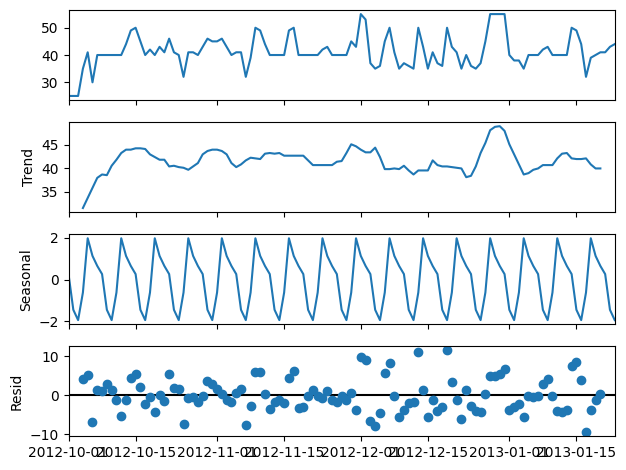

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df, model="add")
decompose_data.plot();

Panel 1-The raw data fluctuates over time but does not remain constant.

Panel 2- The demand for Continental Breakfast has a general increasing trend over time.

Panel 3- The repeating pattern suggests seasonality in the data.

Panel 4- No strong patterns in the residuals indicate that most of the variance is captured by the trend and seasonality components.

## Moving Average

In [ ]:
periods = 7
rolling_MA  = df.copy()
rolling_MA['MovingAverage'] = df.Continental_BF.rolling(periods).mean()
print(rolling_MA.head(14))
fig = px.line(rolling_MA, x = rolling_MA.index, y = ['Continental_BF', 'MovingAverage'],
              labels = {'value': 'Continental_BF', 'date':'Date','variable': 'Variable'})
fig.show()

            Continental_BF  MovingAverage
Date                                     
2012-10-01              25            NaN
2012-10-02              25            NaN
2012-10-03              25            NaN
2012-10-04              35            NaN
2012-10-05              41            NaN
2012-10-06              30            NaN
2012-10-07              40      31.571429
2012-10-08              40      33.714286
2012-10-09              40      35.857143
2012-10-10              40      38.000000
2012-10-11              40      38.714286
2012-10-12              40      38.571429
2012-10-13              44      40.571429
2012-10-14              49      41.857143


## Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fitting the model and making forecast.
ets_model = SimpleExpSmoothing(df)
ets_fit = ets_model.fit(smoothing_level=0.3,optimized=False)
ets_fit.fittedvalues

,0
Date,
2012-10-01,25.000000
2012-10-02,25.000000
2012-10-03,25.000000
2012-10-04,25.000000
2012-10-05,28.000000
...,...
2013-01-19,40.311088
2013-01-20,40.217762
2013-01-21,40.452433


In [ ]:
PERIODS_AHEAD = 7
fig = px.line(x = df.index, y = df['Continental_BF'], labels = {'x': 'Date', 'y':'Continental_BF'})
fig.add_scatter(x = ets_fit.fittedvalues.index, y = ets_fit.fittedvalues, name = 'Fitted Values')
fig.add_scatter(x = ets_fit.forecast(PERIODS_AHEAD).index, y = ets_fit.forecast(PERIODS_AHEAD), name = 'Forecast')
fig.show()

## 3.2. Double Exponential Smoothing - Holt's Model (Not needed as of data has seasonality trend)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fitting the model and making forecast.
ets_model = ExponentialSmoothing(df, trend='add',
                    seasonal=None, initialization_method = 'estimated')
ets_fit = ets_model.fit(smoothing_level = 0.1, smoothing_trend = 0.2,optimized = True)
forecast = ets_fit.forecast(PERIODS_AHEAD)
print(forecast)

2013-01-24    40.721616
2013-01-25    40.581307
2013-01-26    40.440997
2013-01-27    40.300687
2013-01-28    40.160377
2013-01-29    40.020067
2013-01-30    39.879757
Freq: D, dtype: float64


In [ ]:
fig = px.line(x = df.index, y = df['Continental_BF'], labels = {'x': 'Date', 'y':'Demand'})
fig.add_scatter(x = ets_fit.fittedvalues.index, y = ets_fit.fittedvalues, name = 'Fitted Values')
fig.add_scatter(x = ets_fit.forecast(PERIODS_AHEAD).index, y = ets_fit.forecast(PERIODS_AHEAD), name = 'Forecast')
fig.show()

## 3.3 Triple exponential smoothing (Winters' model) - Took Seasonal_period as 15 because MAPE was best with this number

In [ ]:
# Fitting the model and making forecast.
ets_model = ExponentialSmoothing(df, trend='add', seasonal='mul', seasonal_periods=15)
ets_fit = ets_model.fit(smoothing_level=0.1, smoothing_trend=0.1, smoothing_seasonal=0.1)  # α - Level smoothing, β - Trend smoothing
forecast = ets_fit.forecast(PERIODS_AHEAD)
print(round(ets_fit.fittedvalues,0))

Date
2012-10-01    36.0
2012-10-02    37.0
2012-10-03    34.0
2012-10-04    29.0
2012-10-05    32.0
              ... 
2013-01-19    38.0
2013-01-20    42.0
2013-01-21    40.0
2013-01-22    40.0
2013-01-23    40.0
Freq: D, Length: 115, dtype: float64


Practice Exercise: Plot the results

In [ ]:
# Insert yuor code here:
fig = px.line(x = df.index, y = df['Continental_BF'], labels = {'x': 'Date', 'y':'Demand'})
fig.add_scatter(x = ets_fit.fittedvalues.index, y = ets_fit.fittedvalues, name = 'Fitted Values')
fig.add_scatter(x = ets_fit.forecast(PERIODS_AHEAD).index, y = ets_fit.forecast(PERIODS_AHEAD), name = 'Forecast')
fig.show()

## Cross-Validation for ETS Models

In [ ]:
# Let us build a function that calculates MAPE to autmoate some steps further:
def calculate_mape(actual_values, predicted_values):
    return (abs((actual_values - predicted_values) / actual_values)).mean() * 100


In [ ]:
# Create a train and test sets:
#train, test = df.iloc[:len(df) * 0.8], df.iloc[len(df) * 0.8:]
train, test = df.iloc[:round(len(df) * 0.8)], df.iloc[round(len(df) * 0.8):]

In [ ]:

#Simple ETS

# Fitting the model and making forecast.
#ets_model_ets = SimpleExpSmoothing(train).fit()
ets_model_ets = SimpleExpSmoothing(train).fit(smoothing_level=0.1,optimized=False)
forecast_ets = ets_model_ets.forecast(len(test))

# Holt
# Create forecast using Holt's model here

ets_model_holts = ExponentialSmoothing(train, trend='add',
                    seasonal=None, initialization_method = 'estimated').fit(smoothing_level = 0.1, smoothing_trend = 0.1, optimized = False)
forecast_holts=ets_model_holts.forecast(len(test))  #shouldn't be used as our decomposition shows seasonality

# Winters
# Create forecast using Winters' model here

ets_model_winters = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=15).fit(smoothing_level=0.1, smoothing_trend=0.1, smoothing_seasonal=0.1)
forecast_winters = ets_model_winters.forecast(len(test))


In [ ]:
# Calculate MAPE for all three models:
print('MAPE for the ETS model:', calculate_mape(test['Continental_BF'], forecast_ets),"%")
print('MAPE for the Holt model:', calculate_mape(test['Continental_BF'], forecast_holts),"%")
print('MAPE for the Winters model:', calculate_mape(test['Continental_BF'], forecast_winters),"%")


MAPE for the ETS model: 12.883581228839965 %
MAPE for the Holt model: 23.888557593790246 %
MAPE for the Winters model: 19.250687442931568 %


#Forecasting using ARIMA model

## Check for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df)

print(f'ADF Statistic {adf[0]}') # adf[0] - returns the ADF statistic value
print(f'p-value {adf[1]}') # adf[1] - returns the p-value -- if this value is high, the data is non-stationary


ADF Statistic -6.140300480128494
p-value 8.001298246056169e-08


p-value is small that means the data is stationary.

## Explore autocorrelation

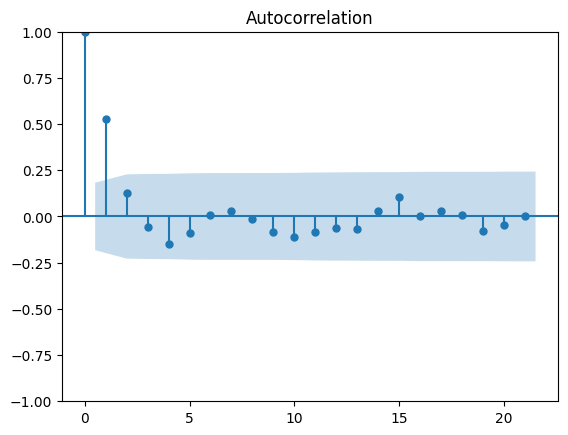

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df).show()


Lag 0 is Always 1 because a time series is perfectly correlated with itself.

Lag 1 is relatively high (0.5), meaning the data at time t is correlated with the data at t-1. This suggests yesterday's demand has an influence on today's demand.

After lag 2-3, the correlation quickly drops close to zero and stays within the confidence band (shaded region), meaning weak or no strong seasonal effects or not weekly effect.

Bars inside the blue shaded region indicate that the correlation at that lag is not statistically significant, meaning the time series does not have strong long-term autocorrelations.

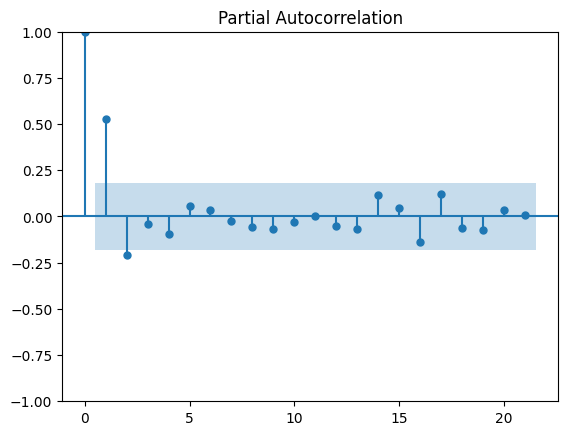

In [ ]:
plot_pacf(df).show()

The second lag (lag 2) is still significant, meaning AR(2) model is needed.

After lag 1, all bars fall within the confidence band (shaded region), meaning further lags don't add much predictive power. So, there's no strong evidence for higher-order autoregression.

## Fit ARIMA model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model of order (p,d,q)
model = ARIMA(df, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Continental_BF   No. Observations:                  115
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -342.380
Date:                Sat, 08 Feb 2025   AIC                            692.760
Time:                        06:34:20   BIC                            703.739
Sample:                    10-01-2012   HQIC                           697.216
                         - 01-23-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.2158      0.843     48.883      0.000      39.563      42.868
ar.L1          0.3331      0.123      2.705      0.007       0.092       0.574
ma.L1          0.3343      0.150      2.227      0.0

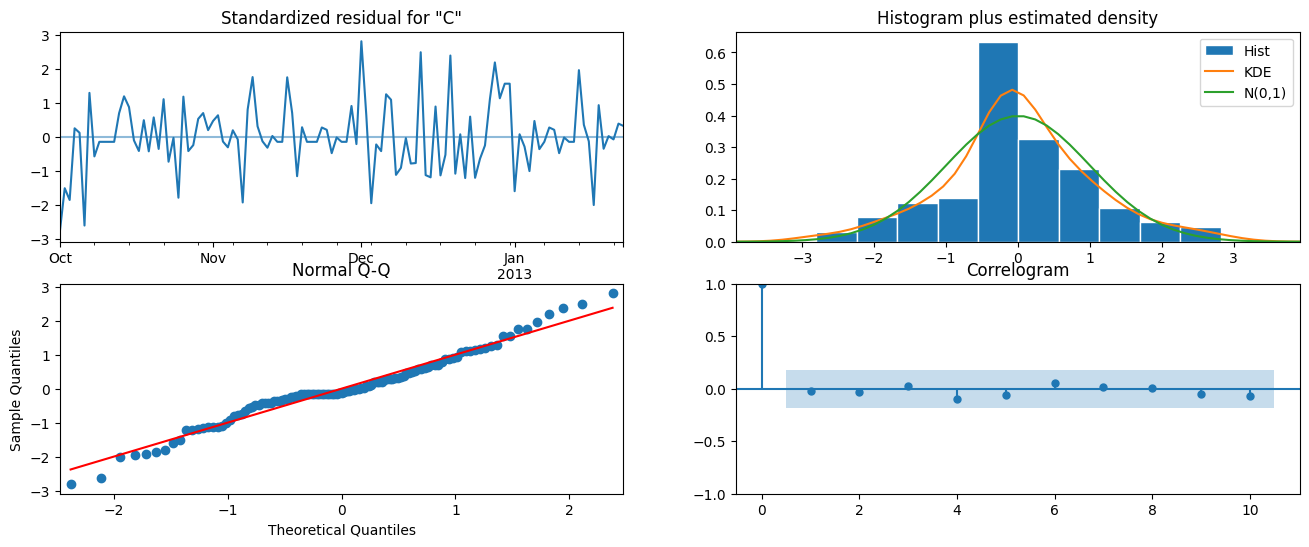

In [ ]:
model_fit.plot_diagnostics(figsize = (16,6)).show()

## Search for the best ARIMA model using pmdarima

pmdarima automates the search for the best ARIMA model, it goes through many p,q,d combinations, and selects the model with the lowest AIC

In [ ]:
#install pmdarima package
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.2 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

model_fit = pm.auto_arima(df,
                             start_p=1, start_q=1, start_d=1,
                             max_p=12, max_q=12, max_d=12,
                            seasonal=False, #True would fit a SARIMA model
                            error_action='ignore',
                            suppress_warnings=True,
                            trace = True,
                            stepwise = True,
                            stationary=True)
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=692.761, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=733.400, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=695.003, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=694.928, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1186.400, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=694.217, Time=1.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=694.750, Time=1.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=693.383, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=692.523, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=694.454, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=696.514, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 4.608 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -342.262
Date:                Sat, 08 Feb 2025   AIC                            692.523
Time:                        06:32:22   BIC                            703.503
Sample:                    10-01-2012   HQIC                           696.980
                         - 01-23-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
interce

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
arima_train = pm.auto_arima(train,
                             start_p=1, start_q=1, start_d=1,
                             max_p=12, max_q=12, max_d=12,
                            seasonal=False,
                            error_action='ignore',
                            suppress_warnings=True,
                            trace = True,
                            stepwise = True,
                            stationary= True)
print('MAPE for the ARIMA model:', calculate_mape(test['Continental_BF'], arima_train.predict(len(test))),"%")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=582.257, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=950.292, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=842.001, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,1)(0,0,0)[0]             : AIC=586.019, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=571.961, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,2)(0,0,0)[0]             : AIC=766.262, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=573.035, Time=1.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,3)(0,0,0)[0]             : AIC=573.285, Time=2.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,3)(0,0,0)[0]             : AIC=728.811, Time=2.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,3)(0,0,0)[0]             : AIC=575.460, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=565.631, Time=0.99 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=565.049, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=566.582, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=565.369, Time=0.76 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=563.726, Time=1.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=564.348, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=565.556, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=599.860, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=564.102, Time=0.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=567.588, Time=0.66 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 12.379 seconds
MAPE for the ARIMA model: 8.269031422679626 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



## SARIMA

In [ ]:
Sarima_model = pm.auto_arima(df,
                      start_p=1, max_p=3,   # AR terms
                      start_q=1, max_q=3,   # MA terms
                      start_d=0, max_d=2,   # Differencing terms
                      seasonal=True,        # Enable SARIMA
                      m=15,                  # Weekly seasonality
                      start_P=0, max_P=2,   # Seasonal AR terms
                      start_Q=0, max_Q=2,   # Seasonal MA terms
                      start_D=0, max_D=1,   # Seasonal differencing
                      error_action='ignore',
                      suppress_warnings=True,
                      trace=True,
                      stepwise=True)

# Print Best Model
print(Sarima_model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[15] intercept   : AIC=692.761, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[15] intercept   : AIC=733.400, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(1,0,0)[15] intercept   : AIC=693.947, Time=1.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,1)(0,0,1)[15] intercept   : AIC=693.919, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[15]             : AIC=1186.400, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(1,0,0)[15] intercept   : AIC=693.237, Time=4.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(0,0,1)[15] intercept   : AIC=690.948, Time=3.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(1,0,1)[15] intercept   : AIC=693.150, Time=2.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(0,0,2)[15] intercept   : AIC=692.926, Time=1.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(1,0,2)[15] intercept   : AIC=694.930, Time=2.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(0,0,1)[15] intercept   : AIC=693.665, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,1)(0,0,1)[15] intercept   : AIC=692.469, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,2)(0,0,1)[15] intercept   : AIC=692.895, Time=0.50 sec
 ARIMA(0,0,0)(0,0,1)[15] intercept   : AIC=733.613, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,0,2)(0,0,1)[15] intercept   : AIC=691.460, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(0,0,1)[15] intercept   : AIC=690.597, Time=0.71 sec
 ARIMA(2,0,0)(0,0,0)[15] intercept   : AIC=692.523, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(1,0,1)[15] intercept   : AIC=inf, Time=0.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(0,0,2)[15] intercept   : AIC=692.537, Time=1.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(1,0,0)[15] intercept   : AIC=690.519, Time=2.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(2,0,0)[15] intercept   : AIC=692.516, Time=3.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(2,0,1)[15] intercept   : AIC=694.587, Time=2.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,0,0)(1,0,0)[15] intercept   : AIC=693.480, Time=1.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,1)(1,0,0)[15] intercept   : AIC=697.543, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(3,0,1)(1,0,0)[15] intercept   : AIC=inf, Time=1.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(1,0,0)[15]             : AIC=721.718, Time=0.30 sec

Best model:  ARIMA(2,0,0)(1,0,0)[15] intercept
Total fit time: 32.360 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 15)   Log Likelihood                -340.260
Date:                            Thu, 06 Feb 2025   AIC                            690.519
Time:                                    10:10:21   BIC                            704.244
Sample:                                10-01-2012   HQIC                           696.090
                                     - 01-23-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [ ]:
Sarima = pm.auto_arima(train,
                      start_p=1, max_p=3,   # AR terms
                      start_q=1, max_q=3,   # MA terms
                      start_d=0, max_d=2,   # Differencing terms
                      seasonal=True,        # Enable SARIMA
                      m=5,                  # Weekly seasonality
                      start_P=0, max_P=2,   # Seasonal AR terms
                      start_Q=0, max_Q=2,   # Seasonal MA terms
                      start_D=0, max_D=1,   # Seasonal differencing
                      error_action='ignore',
                      suppress_warnings=True,
                      trace=True,
                      stepwise=True)
print('MAPE for the SARIMA model:', calculate_mape(test['Continental_BF'], Sarima.predict(len(test))),"%")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[5] intercept   : AIC=563.726, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=599.860, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=566.124, Time=0.57 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=567.980, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=950.292, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(1,0,0)[5] intercept   : AIC=565.460, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(0,0,1)[5] intercept   : AIC=565.392, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(1,0,1)[5] intercept   : AIC=595.544, Time=2.63 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AIC=566.582, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,0)(0,0,0)[5] intercept   : AIC=564.348, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,1)(0,0,0)[5] intercept   : AIC=565.556, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,2)(0,0,0)[5] intercept   : AIC=565.631, Time=0.25 sec
 ARIMA(0,0,2)(0,0,0)[5] intercept   : AIC=565.049, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(2,0,0)(0,0,0)[5] intercept   : AIC=564.102, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[5] intercept   : AIC=567.588, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,0,1)(0,0,0)[5]             : AIC=582.257, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[5] intercept
Total fit time: 6.848 seconds
MAPE for the SARIMA model: 8.269031422679626 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

